<a href="https://colab.research.google.com/github/federicorey/ciencia_datos_uade/blob/master/Aviacion_Civil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aviacion Civil


---

La Administración Nacional de Aviación Civil podría estar interesada en mejorar la eficiencia y seguridad del transporte aéreo, analizar la saturación de ciertos aeropuertos o rutas, y evaluar la capacidad de la infraestructura aeroportuaria en función del crecimiento de pasajeros y vuelos. Las preguntas de negocio podrían incluir:
- ¿Cuáles son las rutas más frecuentadas?
- ¿Cómo varía la demanda de vuelos a lo largo del tiempo?
- ¿Qué aeropuertos requieren expansión o mejoras según los volúmenes de tráfico?
- ¿Qué compañías controlan la mayor parte del mercado aéreo?
- ¿Cómo influyen el clima, fiestas y festivales en la demanda de vuelos?
- ***Esta análisis se basa en los vuelos comerciales nacionales***

## Extraccion

### Aterrizajes y despegues procesados por la Administración Nacional de Aviación Civil (ANAC)

In [ ]:
# Vuelos
%%capture
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/aa8337de-3565-4ecf-9cd9-6f1c61f8f0ed/download/2019_informe_ministerio.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/d0e75e7d-e416-470f-bedb-ef2a877cbae3/download/2020_informe_ministerio.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/1b4f569a-cab0-4560-993c-5bf96c3e7cf0/download/202112_informe_ministerio.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/11894a35-de36-4579-b084-d1191f551fbe/download/202212-informe-ministerio.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/e910fead-ade3-40ce-ae8f-cad2017aa007/download/202312-informe-ministerio-actualizado-dic.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/6004191c-83ca-4a0a-a687-c059bb0a8c8e/download/202408-informe-ministerio.csv

### Lista de Aeropuertos

In [ ]:
# Aeropuertos
%%capture
!wget https://datos.transporte.gob.ar/dataset/62b3fe5f-ffe6-4d8f-9d59-bfabe75d1ee8/resource/eb54e49e-9a5a-4614-91f4-526c650d0105/download/aeropuertos_detalle.csv

## Transformacion

#### Esquema de datos: **Vuelos**


| **Campo**                     | **Tipo de Dato** | **Descripción**                                                                                                                                     |
|-------------------------------|-----------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fecha**                     | date            | Fecha de vuelo UTC                                                                                                                                  |
| **Hora UTC**                  | string          | Hora UTC (Tiempo Universal Coordinado). Al evaluar el dato, considerar que Argentina tiene hora oficial UTC -3.                                      |
| **Clase de Vuelo**            | string          | Categorías de vuelos                                                                                                                                |
| **Clasificación Vuelo**        | string          | Clasificación del tipo de vuelo: Cabotaje o Internacional                                                                                           |
| **Tipo de Movimiento**        | string          | Clasificación del tipo de movimiento. Se considera “Movimiento” a una operación, sea aterrizaje o despegue.                                          |
| **Aeropuerto**                | string          | Nombre del aeropuerto (código FAA)                                                                                                                  |
| **Origen / Destino**          | string          | Código FAA para aeropuertos nacionales y OACI para aeropuertos extranjeros                                                                           |
| **Aerolínea Nombre**          | string          | Nombre de la línea aérea                                                                                                                            |
| **Aeronave**                  | string          | Código para identificar a los fabricantes de las aeronaves con la designación específica del modelo del avión.                                        |
| **Pasajeros**                 | integer         | Cantidad de pasajeros por operación individual (despegue/aterrizaje). Para vuelos de cabotaje se registra despegue y aterrizaje.                      |
| **PAX**                       | string   | 1 pax = 1 tarjeta de embarque. Usar esta columna al analizar la cantidad de pasajeros de cabotaje a nivel total país.                                 |
| **Calidad dato**              | no utilizado    | La información de los últimos 3 meses es provisoria.                                                                                                |





#### Esquema de datos: **Aeropuertos**

| **Campo**        | **Tipo de Dato** | **Descripción**                                                                                                   |
|------------------|------------------|-------------------------------------------------------------------------------------------------------------------|
| **Local**        | string           | Localidad donde se encuentra el aeropuerto.                                                                       |
| **OACI**         | string           | Abreviación del aeropuerto (código OACI).                                                                         |
| **IATA**         | string           | Código de tres letras asignado por la Asociación Internacional de Transporte Aéreo (IATA).                        |
| **Tipo**         | string           | Se refiere al tipo de infraestructura (aeródromo o helipuerto).                                                   |
| **Denominación** | string           | Nombre oficial del aeródromo o helipuerto.                                                                        |
| **Coordenadas**  | string           | Coordenadas geográficas en formato estándar.                                                                      |
| **Latitud**      | string           | Especifica la ubicación exacta en grados de latitud.                                                              |
| **Longitud**     | string           | Especifica la ubicación exacta en grados de longitud.                                                             |
| **Elev**         | float            | Elevación del aeródromo sobre el nivel del mar.                                                                   |
| **UOM Elev**     | string           | Unidad de medida utilizada para expresar la elevación (metros o pies).                                            |
| **Ref**          | string           | Referencia de ubicación.                                                                                          |
| **Distancia Ref**| float            | Distancia desde la referencia especificada.                                                                       |
| **Dirección Ref**| string           | Dirección en grados desde el punto de referencia.                                                                 |
| **Condición**    | string           | Condición operativa del aeródromo (público o privado).                                                            |
| **Control**      | string           | Indica si el aeródromo tiene control de tráfico aéreo.                                                            |
| **Región**       | string           | Región administrativa donde está ubicado el aeródromo.                                                            |
| **FIR**          | string           | Región de Información de Vuelo (Flight Information Region).                                                       |
| **Uso**          | string           | Uso del aeródromo (militar, civil o mixto).                                                                       |
| **Tráfico**      | string           | Tipo de tráfico permitido (internacional o nacional).                                                             |
| **SNA**          | string           | Indica si pertenece al Sistema Nacional de Aeropuertos (SNA).                                                     |
| **Concesionado** | string           | Indica si el aeródromo está concesionado a una entidad privada.                                                   |
| **Provincia**    | string           | Provincia en la que se encuentra el aeródromo.                                                                    |
| **Inhab**        | no utilizado     | Indica si el aeródromo está inhabilitado para operaciones.                                                        |


In [ ]:
# Importamos librerias
import pandas as pd

#### Limpieza, Validacion y Correccion: Vuelos

In [ ]:
# Cargar a dataframe archivos CSV
df_2019 = pd.read_csv("/content/2019_informe_ministerio.csv", sep=';')
df_2020 = pd.read_csv("/content/2020_informe_ministerio.csv", sep=';')
df_2021 = pd.read_csv("/content/202112_informe_ministerio.csv", sep=';')
df_2022 = pd.read_csv("/content/202212-informe-ministerio.csv", sep=';' )
df_2023 = pd.read_csv("/content/202312-informe-ministerio-actualizado-dic.csv", sep=';')
df_2024 = pd.read_csv("/content/202408-informe-ministerio.csv", sep=';')

<ipython-input-4-59780bb1aa51>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv("/content/2020_informe_ministerio.csv", sep=';')
<ipython-input-4-59780bb1aa51>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv("/content/202212-informe-ministerio.csv", sep=';' )


***Se corrige el warning al importar, ya que se detecta tipo de datos mixtos. Se corrige en la celda siguiente***

In [ ]:
# Corregir tipo de datos en columna (8) de df_2020 y columna (10) de df_2022
df_2020['Aeronave'] = df_2020['Aeronave'].astype(str)
df_2022['PAX'] = df_2022['PAX'].astype(str)

In [ ]:
# Contar la cantidad de columnas de cada dataframe
print("Cantidad de columnas en df_2019:", len(df_2019.columns))
print("Cantidad de columnas en df_2020:", len(df_2020.columns))
print("Cantidad de columnas en df_2021:", len(df_2021.columns))
print("Cantidad de columnas en df_2022:", len(df_2022.columns))
print("Cantidad de columnas en df_2023:", len(df_2023.columns))
print("Cantidad de columnas en df_2024:", len(df_2024.columns))

Cantidad de columnas en df_2019: 12
Cantidad de columnas en df_2020: 12
Cantidad de columnas en df_2021: 1
Cantidad de columnas en df_2022: 12
Cantidad de columnas en df_2023: 12
Cantidad de columnas en df_2024: 12


***Nota: Se detecta un error de importación, ya que uno de los archivos CSV tiene un delimitador distinto al resto de los archivos y eso provoca la importacion a una sola columna del df_2021. Se corrige en la celda siguiente***

In [ ]:
df_2021 = pd.read_csv("/content/202112_informe_ministerio.csv", sep=',')

In [ ]:
# Combinar todos los df de vuelos en uno solo
df_vuelos = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024])

In [ ]:
df_vuelos.columns, df_vuelos.shape

(Index(['Fecha', 'Hora UTC', 'Clase de vuelos (todos los vuelos)',
        'Clasificacion Vuelo', 'Tipo Movimiento', 'Aeropuerto',
        'Origen/Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros', 'PAX',
        'Calidad del dato', 'Clase de Vuelo (todos los vuelos)',
        'Clasificación Vuelo', 'Tipo de Movimiento', 'Origen / Destino',
        'Calidad dato', 'Fecha UTC'],
       dtype='object'),
 (2532886, 18))

***Se detecta que las columnas de cada df son diferentes en su etiqueta. Deberían ser 12 y se encuentran 18.Se corrige en la celda siguiente***

In [ ]:
columnas = ['Fecha', 'Hora UTC', 'Clase de Vuelo', 'Clasificacion Vuelo', 'Tipo Movimiento', 'Aeropuerto',
        'Origen / Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros', 'PAX', 'Calidad del dato']

df_2019.columns = columnas
df_2020.columns = columnas
df_2021.columns = columnas
df_2022.columns = columnas
df_2023.columns = columnas
df_2024.columns = columnas

df_vuelos = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024])

In [ ]:
# Verificar
df_vuelos.columns, df_vuelos.shape

(Index(['Fecha', 'Hora UTC', 'Clase de Vuelo', 'Clasificacion Vuelo',
        'Tipo Movimiento', 'Aeropuerto', 'Origen / Destino', 'Aerolinea Nombre',
        'Aeronave', 'Pasajeros', 'PAX', 'Calidad del dato'],
       dtype='object'),
 (2532886, 12))

In [ ]:
df_vuelos.head()

,Fecha,Hora UTC,Clase de Vuelo,Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad del dato
0,1/1/2019,00:01:00,REGULAR,Doméstico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,88,44,DEFINITIVO
1,1/1/2019,00:01:00,REGULAR,Internacional,Aterrizaje,EZE,SBGL,TRANSPORTES AEREOS DEL MERCOSUR,NaN,165,165,DEFINITIVO
2,1/1/2019,00:03:00,REGULAR,Doméstico,Aterrizaje,AER,SIS,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A,EMB-ERJ190100IGW,22,11,DEFINITIVO
3,1/1/2019,00:04:00,REGULAR,Internacional,Aterrizaje,EZE,SBGR,TRANSPORTES AEREOS DEL MERCOSUR,NaN,69,69,DEFINITIVO
4,1/1/2019,00:06:00,REGULAR,Internacional,Aterrizaje,AER,SBGR,LAN ARGENTINA S.A. (LATAM AIRLINES),AIB-A-320-233,53,53,DEFINITIVO


In [ ]:
# Validacion de datos null
df_vuelos.isnull().sum()

,0
Fecha,0
Hora UTC,0
Clase de Vuelo,0
Clasificacion Vuelo,0
Tipo Movimiento,3
Aeropuerto,0
Origen / Destino,3
Aerolinea Nombre,182407
Aeronave,91661
Pasajeros,0


In [ ]:
# Visualizar los tres registros que tiene valor null en la columna 'Tipo Movimiento'
df_vuelos[df_vuelos['Tipo Movimiento'].isnull()]

,Fecha,Hora UTC,Clase de Vuelo,Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad del dato
110721,8/3/2019,18:05:00,VUELOS PRIVADOS NACIONALES,Doméstico,NaN,AER,NaN,NaN,BE-A-100,0,0,DEFINITIVO
388994,30/8/2019,19:34:00,VUELOS ESCUELA,Doméstico,NaN,ROS,NaN,FLYING TIME,TEA-P2002-JF,0,0,DEFINITIVO
564141,19/12/2019,20:54:00,VUELOS ESCUELA,Doméstico,NaN,MOR,NaN,NaN,CE-150-J,0,0,DEFINITIVO


***Estos tres registros no son útiles por tratarse de vuelos no comerciales, se verificará si hay mas registros de "Clase de Vuelo" con categorias que no esten en el rango de vuelos nacionales comerciales***

In [ ]:
# categorias para clase de vuelo
df_vuelos['Clase de Vuelo'].value_counts()

,count
Clase de Vuelo,
Regular,1015522
REGULAR,363440
Vuelo Privado con Matrícula Nacional,322744
Vuelo Escuela,266382
No Regular,172725
Vuelo Oficial Nacional,134455
VUELOS ESCUELA,80441
VUELOS PRIVADOS NACIONALES,72277
NO REGULAR,28304


***Solo se tomará en cuenta los registros categorizados como regulares ('REGULAR' y 'Regular'), el resto serán eliminados***

In [ ]:
# Filtrar el DataFrame para incluir solo los registros con 'Clase de Vuelo' igual a 'REGULARES' o 'regulares'
df_vuelos = df_vuelos[df_vuelos['Clase de Vuelo'].isin(['REGULAR', 'Regular'])]
df_vuelos.shape

(1378962, 12)

In [ ]:
# Nueva validacion de datos null
df_vuelos.isnull().sum()

,0
Fecha,0
Hora UTC,0
Clase de Vuelo,0
Clasificacion Vuelo,0
Tipo Movimiento,0
Aeropuerto,0
Origen / Destino,0
Aerolinea Nombre,86
Aeronave,61186
Pasajeros,0


In [ ]:
# Visualizar los registros que tiene valor null en la columna 'Aerolinea Nombre'
df_vuelos[df_vuelos['Aerolinea Nombre'].isnull()]

,Fecha,Hora UTC,Clase de Vuelo,Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad del dato
7971,6/1/2019,12:35:00,REGULAR,Doméstico,Despegue,DOZ,DOZ,NaN,NaN,0,0,DEFINITIVO
15319,10/1/2019,22:14:00,REGULAR,Doméstico,Aterrizaje,NEU,NEU,NaN,PA-PA-28-140,0,0,DEFINITIVO
17268,11/1/2019,23:33:00,REGULAR,Internacional,Aterrizaje,CBA,SGAS,NaN,CE-500,4,4,DEFINITIVO
17309,11/1/2019,23:58:00,REGULAR,Doméstico,Despegue,CBA,CBA,NaN,CE-500,0,0,DEFINITIVO
17313,12/1/2019,00:00:00,REGULAR,Doméstico,Aterrizaje,CBA,CBA,NaN,CE-500,0,0,DEFINITIVO
...,...,...,...,...,...,...,...,...,...,...,...,...
534478,1/12/2019,13:58:00,REGULAR,Doméstico,Despegue,CHP,NEU,NaN,TXI-172M,0,0,DEFINITIVO
550532,11/12/2019,13:22:00,REGULAR,Doméstico,Despegue,AER,PTM,NaN,EMB-EMB-145LR,64,32,DEFINITIVO
554304,13/12/2019,18:35:00,REGULAR,Doméstico,Aterrizaje,SVO,ESC,NaN,NaN,0,0,DEFINITIVO
573886,26/12/2019,20:40:00,REGULAR,Doméstico,Despegue,SVO,FDO,NaN,BE-65-A-90,0,0,DEFINITIVO


In [ ]:
# Registros sin nombre de aerolinea
df_vuelos[df_vuelos['Aerolinea Nombre'].isnull()].shape

(86, 12)

In [ ]:
df_vuelos.shape

(1378962, 12)

***Criterio de eliminacion de registros: La cantidad de registros sin nombre de aerolinea asignado no nos es útil, y dado que es un porcentaje muy menor del total de registros el impacto en el análisis tambien será bajo***

In [ ]:
# Eliminar los registros donde 'Aerolinea Nombre' es nulo
df_vuelos = df_vuelos.dropna(subset=['Aerolinea Nombre'])
df_vuelos.shape

(1378876, 12)

***No se realizará eliminacion de los valores nulos de aeronave, ya que la cantidad de registros es significativa y no afectará tanto en el análisis***

In [ ]:
# Eliminacion de los vuelos internacionales
df_vuelos = df_vuelos[df_vuelos['Clasificacion Vuelo'] != 'Internacional']
df_vuelos.shape

(1074928, 12)

***Eliminar la columna "Calidad del dato" ya que no se utilizará para el análisis***

In [ ]:
# Eliminar la columna Calidad del dato
df_vuelos = df_vuelos.drop(columns=['Calidad del dato'])


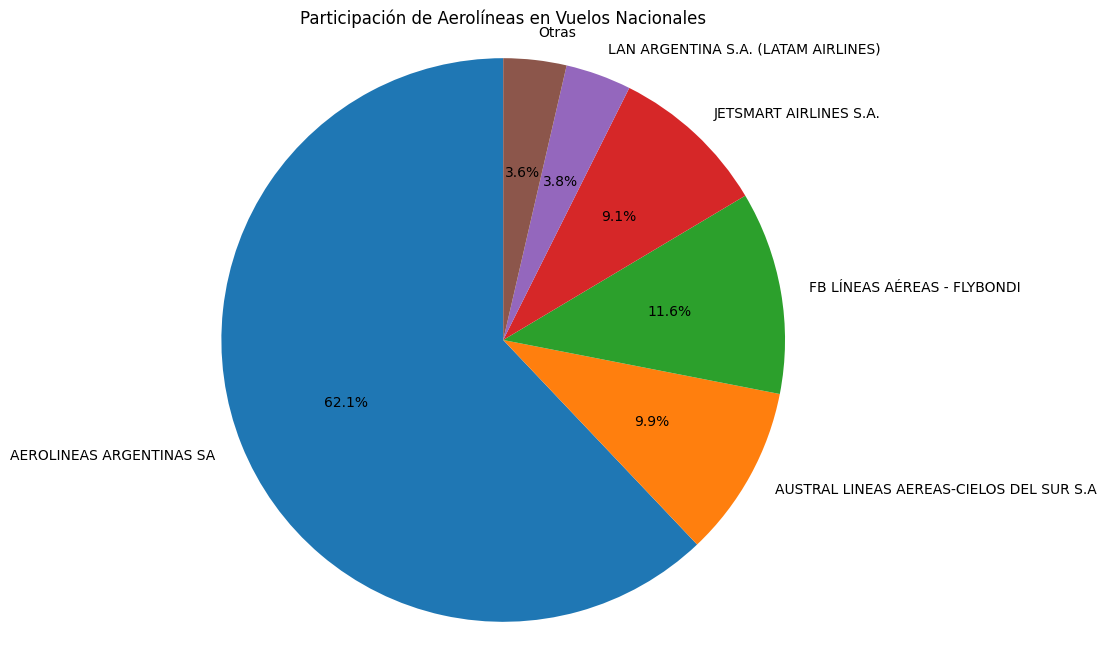

In [ ]:
# grafico de torta con las diferentes nombre de aerolineas, las aerolineas con menos de 3.5% de participacion se unificaran como categoria "otras"

import matplotlib.pyplot as plt

# Agrupar por aerolínea y contar la cantidad de vuelos
aerolineas_counts = df_vuelos.groupby('Aerolinea Nombre')['Aerolinea Nombre'].count()

# Calcular el porcentaje de participación de cada aerolínea
aerolineas_porcentaje = (aerolineas_counts / aerolineas_counts.sum()) * 100

# Crear una categoría "Otras" para aerolíneas con menos del 3.5% de participación
otras_aerolineas = aerolineas_porcentaje[aerolineas_porcentaje < 3.5].sum()
aerolineas_porcentaje = aerolineas_porcentaje[aerolineas_porcentaje >= 3.5]
aerolineas_porcentaje['Otras'] = otras_aerolineas

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(aerolineas_porcentaje, labels=aerolineas_porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Participación de Aerolíneas en Vuelos Nacionales')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()

#### Limpieza, Validacion y Correccion: Aeropuertos

In [ ]:
df_aeropuertos = pd.read_csv("/content/aeropuertos_detalle.csv", sep=';')

In [ ]:
df_aeropuertos.head()

,local,oaci,iata,tipo,denominacion,coordenadas,latitud,longitud,elev,uom_elev,...,condicion,control,region,fir,uso,trafico,sna,concesionado,provincia,inhab
0,ACB,NaN,NaN,Aeródromo,CORONEL BOGADO/AGROSERVICIOS,"33°16'20""S 60°34'14""W",-60.57066,-33.27226,44.0,Metros,...,PRIVADO,NOCONTROL,RACE,SAEF,AEROAPP,Nacional,NO,NO,SANTA FÉ,NO
1,ACH,NaN,NaN,Aeródromo,GENERAL ACHA,"37°24' 6""S 64°36'49""W",-64.61351,-37.40164,277.0,Metros,...,PUBLICO,NOCONTROL,RACE,SAEF,CIVIL,Nacional,NO,NO,LA PAMPA,NO
2,ACM,NaN,NaN,Aeródromo,ARRECIFES/LA CURA MALAL,"34° 4'33""S 60° 8'30""W",-60.14170,-34.07574,37.0,Metros,...,PRIVADO,NOCONTROL,RACE,SAEF,CIVIL,Nacional,NO,NO,BUENOS AIRES,NO
3,ADO,SAWD,PUD,Aeródromo,PUERTO DESEADO,"47°44' 6""S 65°54'15""W",-65.90410,-47.73511,82.0,Metros,...,PUBLICO,AERADIO,RASU,SAVF,CIVIL,Nacional,NO,NO,SANTA CRUZ,NO
4,ADT,NaN,NaN,Aeródromo,BANDERA/AGROSERVICIOS DOÑA TERESA,"28°51'19""S 62°15'53""W",-62.26462,-28.85541,75.0,Metros,...,PRIVADO,NOCONTROL,RANO,SACF,AEROAPP,Nacional,NO,NO,SANTIAGO DEL ESTERO,NO


In [ ]:
# Validat categorias de la columna 'tipo'
df_aeropuertos['tipo'].value_counts()

,count
tipo,
Aeródromo,566
Helipuerto,127


***Los registros de Helipuerto no son de nuestro interes. Se eliminan en la celda siguiente***

In [ ]:
# eliminar registros de tipo 'Helipuerto'
df_aeropuertos = df_aeropuertos[df_aeropuertos['tipo'] != 'Helipuerto']

In [ ]:
# Validacion de datos null
df_aeropuertos.isnull().sum()

,0
local,0
oaci,442
iata,476
tipo,0
denominacion,0
coordenadas,0
latitud,0
longitud,0
elev,0
uom_elev,0


***Eliminar la columna "inhab" y "fir" ya que no se utilizará para el análisis***

In [ ]:
# Eliminar la columna "inhab" y "fir"
df_aeropuertos = df_aeropuertos.drop(columns=['inhab', 'fir'])

In [ ]:
# convertir en valor cero los valores nulos de la columna distancia_ref
df_aeropuertos['distancia_ref'].fillna(0, inplace=True)

<ipython-input-36-c12438c16335>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_aeropuertos['distancia_ref'].fillna(0, inplace=True)


***la relacion de codigo del aeropuerto entre df_vuelos y df_aeropuertos es la columna "local", por lo que no tiene mayor importancia los valores nulos de oaci y iata***

In [ ]:
# ver los registros en los que la columna IATA y OACI son nulos
df_aeropuertos[df_aeropuertos[['iata', 'oaci']].isnull().all(axis=1)]


,local,oaci,iata,tipo,denominacion,coordenadas,latitud,longitud,elev,uom_elev,...,distancia_ref,direccion_ref,condicion,control,region,uso,trafico,sna,concesionado,provincia
0,ACB,NaN,NaN,Aeródromo,CORONEL BOGADO/AGROSERVICIOS,"33°16'20""S 60°34'14""W",-60.570660,-33.272260,44.0,Metros,...,6.0,NE,PRIVADO,NOCONTROL,RACE,AEROAPP,Nacional,NO,NO,SANTA FÉ
1,ACH,NaN,NaN,Aeródromo,GENERAL ACHA,"37°24' 6""S 64°36'49""W",-64.613510,-37.401640,277.0,Metros,...,3.0,SO,PUBLICO,NOCONTROL,RACE,CIVIL,Nacional,NO,NO,LA PAMPA
2,ACM,NaN,NaN,Aeródromo,ARRECIFES/LA CURA MALAL,"34° 4'33""S 60° 8'30""W",-60.141700,-34.075740,37.0,Metros,...,4.0,OSO,PRIVADO,NOCONTROL,RACE,CIVIL,Nacional,NO,NO,BUENOS AIRES
4,ADT,NaN,NaN,Aeródromo,BANDERA/AGROSERVICIOS DOÑA TERESA,"28°51'19""S 62°15'53""W",-62.264620,-28.855410,75.0,Metros,...,4.0,N,PRIVADO,NOCONTROL,RANO,AEROAPP,Nacional,NO,NO,SANTIAGO DEL ESTERO
5,ADU,NaN,NaN,Aeródromo,BANDERA/DUTTO,"28°52' 1""S 62°14'17""W",-62.238120,-28.866910,87.0,Metros,...,3.0,NE,PRIVADO,NOCONTROL,RANO,AEROAPP,Nacional,NO,NO,SANTIAGO DEL ESTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,VTO,NaN,NaN,Aeródromo,VENADO TUERTO/LA SIESTA,"33°41'29""S 62° 3'49""W",-62.063690,-33.691320,112.0,Metros,...,12.0,NO,PRIVADO,NOCONTROL,RACE,NaN,Nacional,NO,NO,SANTA FÉ
686,VTS,NaN,NaN,Aeródromo,VENADO TUERTO/SAVESA,"33°46'43""S 61°58'34""W",-61.976090,-33.778720,110.0,Metros,...,3.0,S,PRIVADO,NOCONTROL,RACE,NaN,Nacional,NO,NO,SANTA FÉ
687,YOP,NaN,NaN,Aeródromo,TRES ARROYOS/PETRAZZINI,"38°20'52""S 60°16'34""W",-60.276111,-38.347778,107.0,Metros,...,3.0,N,PRIVADO,NOCONTROL,RACE,NaN,Nacional,NO,NO,BUENOS AIRES
689,YPY,NaN,NaN,Aeródromo,YAPEYÚ,"29°21'32""S 56°47'45""W",-56.795730,-29.358770,53.0,Metros,...,12.0,N,PRIVADO,NOCONTROL,RANE,NaN,Nacional,NO,NO,CORRIENTES


## Carga de datos - Armado de Tablones

In [ ]:
df_merged.head()

,Fecha,Hora UTC,Clase de Vuelo,Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,local_x,Ciudad Despegue,local_y,Ciudad Arribo
0,1/1/2019,00:01:00,REGULAR,Doméstico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,88,44,EZE,EZEIZA/MINISTRO PISTARINI,SAL,SALTA/GENERAL D. MARTÍN MIGUEL DE GÜEMES
1,1/1/2019,00:03:00,REGULAR,Doméstico,Aterrizaje,AER,SIS,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A,EMB-ERJ190100IGW,22,11,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY,SIS,RESISTENCIA
2,1/1/2019,00:09:00,REGULAR,Doméstico,Despegue,TUC,AER,LAN ARGENTINA S.A. (LATAM AIRLINES),AIB-A-320-233,156,78,TUC,TUCUMÁN/TENIENTE BENJAMIN MATIENZO,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY
3,1/1/2019,00:11:00,REGULAR,Doméstico,Despegue,MDP,AER,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A,EMB-ERJ190100IGW,4,2,MDP,MAR DEL PLATA/ASTOR PIAZZOLLA,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY
4,1/1/2019,00:13:00,REGULAR,Doméstico,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,110,55,EZE,EZEIZA/MINISTRO PISTARINI,TUC,TUCUMÁN/TENIENTE BENJAMIN MATIENZO


In [ ]:
# Merge to get departure airport name
df_merged = pd.merge(df_vuelos, df_aeropuertos[['local', 'denominacion','latitud','longitud','provincia']], left_on='Aeropuerto', right_on='local', how='left')
df_merged = df_merged.rename(columns={'denominacion': 'Ciudad Despegue',
                                      'latitud': 'latitud D',
                                      'longitud':'longitud D',
                                      'provincia':'provincia D'})

# Merge again to get arrival airport name
df_merged = pd.merge(df_merged, df_aeropuertos[['local', 'denominacion','latitud','longitud','provincia']], left_on='Origen / Destino', right_on='local', how='left')
df_merged = df_merged.rename(columns={'denominacion': 'Ciudad Arribo',
                                      'latitud': 'latitud A',
                                      'longitud':'longitud A',
                                      'provincia':'provincia A'})


# Select the desired columns, including airport names
df_view_1 = df_merged[['Fecha', 'Hora UTC',
                       'local_x', 'Ciudad Despegue', 'latitud D', 'longitud D', 'provincia D',
                       'local_y', 'Ciudad Arribo', 'latitud A', 'longitud A', 'provincia A',
                       'Pasajeros', 'Aerolinea Nombre']]

# Rename the 'Pasajeros' column for better readability
df_view_1 = df_view_1.rename(columns={'local_x':'Despegue','local_y':'Arribo','Pasajeros': 'CantidadPasajeros'})

# Display the DataFrame
df_view_1

,Fecha,Hora UTC,Despegue,Ciudad Despegue,latitud D,longitud D,provincia D,Arribo,Ciudad Arribo,latitud A,longitud A,provincia A,CantidadPasajeros,Aerolinea Nombre
0,1/1/2019,00:01:00,EZE,EZEIZA/MINISTRO PISTARINI,-58.535833,-34.822222,BUENOS AIRES,SAL,SALTA/GENERAL D. MARTÍN MIGUEL DE GÜEMES,-65.486944,-24.859722,SALTA,88,AEROLINEAS ARGENTINAS SA
1,1/1/2019,00:03:00,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY,-58.416389,-34.558889,CIUDAD AUTÓNOMA DE BUENOS AIRES,SIS,RESISTENCIA,-59.056111,-27.450000,CHACO,22,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A
2,1/1/2019,00:09:00,TUC,TUCUMÁN/TENIENTE BENJAMIN MATIENZO,-65.104722,-26.840833,TUCUMÁN,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY,-58.416389,-34.558889,CIUDAD AUTÓNOMA DE BUENOS AIRES,156,LAN ARGENTINA S.A. (LATAM AIRLINES)
3,1/1/2019,00:11:00,MDP,MAR DEL PLATA/ASTOR PIAZZOLLA,-57.573333,-37.934167,BUENOS AIRES,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY,-58.416389,-34.558889,CIUDAD AUTÓNOMA DE BUENOS AIRES,4,AUSTRAL LINEAS AEREAS-CIELOS DEL SUR S.A
4,1/1/2019,00:13:00,EZE,EZEIZA/MINISTRO PISTARINI,-58.535833,-34.822222,BUENOS AIRES,TUC,TUCUMÁN/TENIENTE BENJAMIN MATIENZO,-65.104722,-26.840833,TUCUMÁN,110,AEROLINEAS ARGENTINAS SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074923,31/08/2024,23:54,EZE,EZEIZA/MINISTRO PISTARINI,-58.535833,-34.822222,BUENOS AIRES,CBA,CÓRDOBA/ING. AER. A. L. V. TARAVELLA,-64.208333,-31.310000,CÓRDOBA,135,AEROLINEAS ARGENTINAS SA
1074924,31/08/2024,23:54,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY,-58.416389,-34.558889,CIUDAD AUTÓNOMA DE BUENOS AIRES,CBA,CÓRDOBA/ING. AER. A. L. V. TARAVELLA,-64.208333,-31.310000,CÓRDOBA,116,AEROLINEAS ARGENTINAS SA
1074925,31/08/2024,23:57,EZE,EZEIZA/MINISTRO PISTARINI,-58.535833,-34.822222,BUENOS AIRES,SAL,SALTA/GENERAL D. MARTÍN MIGUEL DE GÜEMES,-65.486944,-24.859722,SALTA,130,AEROLINEAS ARGENTINAS SA
1074926,31/08/2024,23:58,DOZ,MENDOZA/EL PLUMERILLO,-68.792778,-32.831667,MENDOZA,AER,BUENOS AIRES/AEROPARQUE J. NEWBERY,-58.416389,-34.558889,CIUDAD AUTÓNOMA DE BUENOS AIRES,143,AEROLINEAS ARGENTINAS SA


In [ ]:
df_view_1.to_csv('df_view_1.csv', index=False)
